In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.stats as sis
import statsmodels.tsa.stattools as sta
import pandas as pd
import os

# **Datos señal ECG**

In [84]:
ruta='/content/sample_data/signals.mat'
data=sio.loadmat(ruta)
print(data)
ECG=data['ECG_asRecording']
ECG_f=data['ECG_filtered']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4109.94433594]])}


# **Funcion RMS**

In [72]:
from math import sqrt

def dato_RMS(signal):
  suma_RMS=0
  for i in range(len(signal)):
    suma_RMS=suma_RMS+(signal[i])**2
  RMS=sqrt(1/len(signal)*suma_RMS)
  return RMS


# **Vector Tiempo**

In [85]:
#Vector tiempo señal sin filtrar
T=(1/1024);
ts= T*len(ECG[0]);
t=np.arange(0,ts,T)
print(t)
print(len(ECG[0]))
#Vector tiempo señal filtrada
ts_f= T*len(ECG_f[0]);
t_f=np.arange(0,ts_f,T)
print(t_f)
print(len(ECG_f[0]))

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
30720
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
30720


# **Graficas**

Text(0.5, 1.0, 'Filtrada')

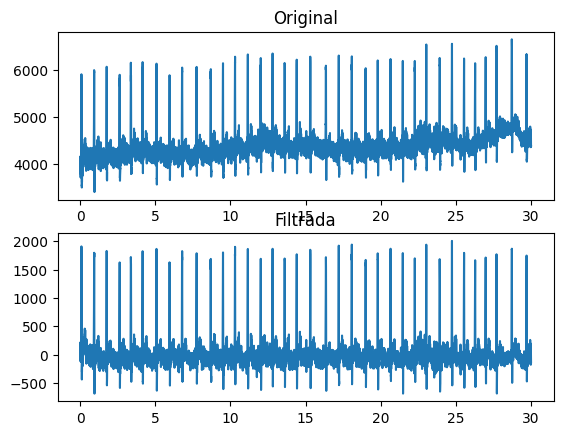

In [87]:
signal_ECG=(ECG[0])
signal_ECG_f=(ECG_f[0])
plt.subplot(2,1,1)
plt.plot(t,signal_ECG,label='Original')
plt.title('Original')
plt.subplot(2,1,2)
plt.plot(t_f,signal_ECG_f,label='Filtrada')
plt.title('Filtrada')